### Content
This file collects all the results from the feature-based baseline models and extracts each model's best results according to performance on the validation set.
It then plots the results on the test set in a bar plot for all models, per sample duration.

In [ ]:
!pip install "pandas<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# imports

import io
import glob
import os
import sys
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
import pandas as pd
import seaborn as sns
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# prompt: Access a folder on google drive and import the data locally
from google.colab import drive
drive.mount('/content/drive/')
# helper files
sys.path.append('/content/drive/MyDrive/Final Project UAV/')
from UAV_project_preprocessing_and_visualization_helper_functions import *

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Final Project UAV/

/content/drive/MyDrive/Final Project UAV


### Loading results

In [ ]:
all_results_df = pd.DataFrame()
for file in glob.glob('./Features Extraction Results unified durations/features_extraction_results*'):
  print(file)
  with open(file, 'rb') as f:
    all_results_df = all_results_df.append(pickle.load(f))


./Features Extraction Results unified durations/features_extraction_results_05_09_2024, 13:48:54
./Features Extraction Results unified durations/features_extraction_results_05_09_2024, 13:57:32
./Features Extraction Results unified durations/features_extraction_results_05_10_2024, 14:51:06
./Features Extraction Results unified durations/features_extraction_results_05_11_2024, 07:19:39
./Features Extraction Results unified durations/features_extraction_results_05_11_2024, 07:53:13


In [ ]:
len(all_results_df)

744

In [ ]:
# all_results_df.sample(10)

In [ ]:
def extract_from_column(df, col, field):
  return df[col].apply(lambda x: x[field])

def features_type(df):
  d_map = {
    (True, True): 'all',
    (True, False): 'range dependent',
    (False, True): 'range independent',
    (False, False): 'none'
  }
  return df['Features Config'].apply(lambda x: d_map[(x['extremum'], x['curve'])])

In [ ]:
all_results_df['Model Random State'] = extract_from_column(all_results_df, 'Model Config', 'model_random_state')
all_results_df['Split Random State'] = extract_from_column(all_results_df, 'Split Config', 'random_state')
all_results_df['Features Type'] = features_type(all_results_df)

In [ ]:
all_results_df = all_results_df[all_results_df['Split Random State'] == 42]
all_results_df.reset_index(drop=True, inplace=True)

In [ ]:
all_results_df.sample(10)

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Model Random State,Split Random State,Features Type
467,"05/11/2024, 07:53:13",30,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 30, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 3, ...","{'airplane': {'precision': 0.559322033898305, ...",0.708036,0.746948,0.720245,0.754822,42,42,all
590,"05/11/2024, 07:53:13",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'poly', 'gamma': 100, 'degree': 3, ...","{'airplane': {'precision': 0.6956521739130435,...",0.707561,0.743973,0.718339,0.754041,42,42,all
368,"05/11/2024, 07:19:39",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C'...","{'airplane': {'precision': 0.7586206896551724,...",0.600000,0.012084,0.023429,0.234590,42,42,all
323,"05/11/2024, 07:19:39",30,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 30, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C'...","{'airplane': {'precision': 0.7333333333333333,...",0.600000,0.012084,0.023429,0.234590,42,42,all
10,"05/09/2024, 13:48:54",25,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 25, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8918918918918919,...",0.748149,0.811913,0.775596,0.834934,42,42,all
382,"05/11/2024, 07:19:39",25,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 25, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'rbf', 'gamma': 100, 'degree': 3, '...","{'airplane': {'precision': 0.0, 'recall': 0.0,...",0.000000,0.000000,0.000000,0.200408,42,42,all
374,"05/11/2024, 07:19:39",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'rbf', 'gamma': 10, 'degree': 3, 'C...","{'airplane': {'precision': 0.0, 'recall': 0.0,...",0.000000,0.000000,0.000000,0.200408,42,42,all
243,"05/11/2024, 07:19:39",20,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 20, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'linear', 'gamma': 0.1, 'degree': 3...","{'airplane': {'precision': 0.6231884057971014,...",0.747142,0.815180,0.776932,0.790738,42,42,all
19,"05/09/2024, 13:48:54",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8529411764705882,...",0.760385,0.842000,0.795449,0.844027,42,42,all
658,"05/11/2024, 07:53:13",25,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 25, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'poly', 'gamma': 100, 'degree': 2, ...","{'airplane': {'precision': 0.8085106382978723,...",0.653950,0.765719,0.699797,0.724252,42,42,all


The model with best validation results (for curiosity):

In [ ]:
all_results_df[all_results_df['UAV f1'] == all_results_df['UAV f1'].max()]

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Model Random State,Split Random State,Features Type
30,"05/09/2024, 13:57:32",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.7469879518072289,...",0.807935,0.835058,0.819593,0.866925,42,42,all
31,"05/09/2024, 13:57:32",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8823529411764706,...",0.807935,0.835058,0.819593,0.866925,42,42,all
32,"05/09/2024, 13:57:32",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8333333333333334,...",0.807935,0.835058,0.819593,0.866925,42,42,all
33,"05/09/2024, 13:57:32",20,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 20, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8695652173913043,...",0.807935,0.835058,0.819593,0.866925,42,42,all
34,"05/09/2024, 13:57:32",25,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 25, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8571428571428571,...",0.807935,0.835058,0.819593,0.866925,42,42,all
35,"05/09/2024, 13:57:32",30,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 30, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8529411764705882,...",0.807935,0.835058,0.819593,0.866925,42,42,all


### Slicing

Best results per model and per sample duration

In [ ]:
all_results_df.groupby(['Sample Duration','Model'])['UAV f1'].aggregate('max')

Sample Duration  Model
5                DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
10               DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
15               DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
20               DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
25               DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
30               DT       0.725507
                 RF       0.795449
                 SVM      0.781692
                 XGB      0.819593
Name: UAV f1, dtype: float64

In [ ]:
#Gathering the rows with best validation performance
max_idx = all_results_df.groupby(['Sample Duration','Model'])['UAV f1'].idxmax()
df_max = all_results_df.loc[max_idx.values]

In [ ]:
#Extracting the test results (kept in memory while training)
df_max['Test UAV report'] = extract_from_column(df_max, 'Evaluation Report', 'uav')
df_max['Test UAV precision'] = extract_from_column(df_max, 'Test UAV report', 'precision')
df_max['Test UAV recall'] = extract_from_column(df_max, 'Test UAV report', 'recall')
df_max['Test UAV F1-score'] = extract_from_column(df_max, 'Test UAV report', 'f1-score')

In [ ]:
df_max

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Model Random State,Split Random State,Features Type,Test UAV report,Test UAV precision,Test UAV recall,Test UAV F1-score
126,"05/10/2024, 14:51:06",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",DT,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.7530864197530864,...",0.679125,0.790678,0.725507,0.802599,42,42,all,"{'precision': 0.8452380952380952, 'recall': 0....",0.845238,0.739583,0.788889
18,"05/09/2024, 13:48:54",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.7261904761904762,...",0.760385,0.842000,0.795449,0.844027,42,42,all,"{'precision': 0.8888888888888888, 'recall': 0....",0.888889,0.750000,0.813559
216,"05/11/2024, 07:19:39",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'linear', 'gamma': 0.1, 'degree': 3...","{'airplane': {'precision': 0.6631578947368421,...",0.758660,0.812708,0.781692,0.794086,42,42,all,"{'precision': 0.8904109589041096, 'recall': 0....",0.890411,0.677083,0.769231
30,"05/09/2024, 13:57:32",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.7469879518072289,...",0.807935,0.835058,0.819593,0.866925,42,42,all,"{'precision': 0.9305555555555556, 'recall': 0....",0.930556,0.697917,0.797619
127,"05/10/2024, 14:51:06",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",DT,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8484848484848485,...",0.679125,0.790678,0.725507,0.802599,42,42,all,"{'precision': 0.9080459770114943, 'recall': 0....",0.908046,0.858696,0.882682
19,"05/09/2024, 13:48:54",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8529411764705882,...",0.760385,0.842000,0.795449,0.844027,42,42,all,"{'precision': 0.9629629629629629, 'recall': 0....",0.962963,0.847826,0.901734
217,"05/11/2024, 07:19:39",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",SVM,"{'kernel': 'linear', 'gamma': 0.1, 'degree': 3...","{'airplane': {'precision': 0.7142857142857143,...",0.758660,0.812708,0.781692,0.794086,42,42,all,"{'precision': 0.9493670886075949, 'recall': 0....",0.949367,0.815217,0.877193
31,"05/09/2024, 13:57:32",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8823529411764706,...",0.807935,0.835058,0.819593,0.866925,42,42,all,"{'precision': 0.9615384615384616, 'recall': 0....",0.961538,0.815217,0.882353
128,"05/10/2024, 14:51:06",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",DT,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8979591836734694,...",0.679125,0.790678,0.725507,0.802599,42,42,all,"{'precision': 0.9176470588235294, 'recall': 0....",0.917647,0.886364,0.901734
20,"05/09/2024, 13:48:54

In [ ]:
df_max.loc[18]['Evaluation Report'] #RF 5

{'airplane': {'precision': 0.7261904761904762,
  'recall': 0.8970588235294118,
  'f1-score': 0.8026315789473685,
  'support': 68},
 'uav': {'precision': 0.8888888888888888,
  'recall': 0.75,
  'f1-score': 0.8135593220338982,
  'support': 96},
 'bird': {'precision': 0.8409090909090909,
  'recall': 0.8314606741573034,
  'f1-score': 0.8361581920903954,
  'support': 89},
 'static-object': {'precision': 0.9454545454545454,
  'recall': 0.9454545454545454,
  'f1-score': 0.9454545454545454,
  'support': 110},
 'accuracy': 0.8567493112947658,
 'macro avg': {'precision': 0.8503607503607503,
  'recall': 0.8559935107853152,
  'f1-score': 0.8494509096315519,
  'support': 363},
 'weighted avg': {'precision': 0.8637884154413079,
  'recall': 0.8567493112947658,
  'f1-score': 0.8570212710185137,
  'support': 363}}

In [ ]:
df_max.loc[23]['Evaluation Report'] #RF 30

{'airplane': {'precision': 0.9655172413793104,
  'recall': 0.8484848484848485,
  'f1-score': 0.9032258064516129,
  'support': 33},
 'uav': {'precision': 0.9577464788732394,
  'recall': 0.8717948717948718,
  'f1-score': 0.9127516778523489,
  'support': 78},
 'bird': {'precision': 0.8461538461538461,
  'recall': 0.9777777777777777,
  'f1-score': 0.9072164948453608,
  'support': 45},
 'static-object': {'precision': 0.9550561797752809,
  'recall': 1.0,
  'f1-score': 0.9770114942528736,
  'support': 85},
 'accuracy': 0.9336099585062241,
 'macro avg': {'precision': 0.9311184365454191,
  'recall': 0.9245143745143746,
  'f1-score': 0.925051368350549,
  'support': 241},
 'weighted avg': {'precision': 0.9370248658732443,
  'recall': 0.9336099585062241,
  'f1-score': 0.9330780156220827,
  'support': 241}}

In [ ]:
df_max.loc[35]['Evaluation Report'] #XGB 30

{'airplane': {'precision': 0.8529411764705882,
  'recall': 0.8787878787878788,
  'f1-score': 0.8656716417910447,
  'support': 33},
 'uav': {'precision': 0.9545454545454546,
  'recall': 0.8076923076923077,
  'f1-score': 0.875,
  'support': 78},
 'bird': {'precision': 0.8461538461538461,
  'recall': 0.9777777777777777,
  'f1-score': 0.9072164948453608,
  'support': 45},
 'static-object': {'precision': 0.9550561797752809,
  'recall': 1.0,
  'f1-score': 0.9770114942528736,
  'support': 85},
 'accuracy': 0.91701244813278,
 'macro avg': {'precision': 0.9021741642362925,
  'recall': 0.9160644910644911,
  'f1-score': 0.9062249077223197,
  'support': 241},
 'weighted avg': {'precision': 0.9205738698584929,
  'recall': 0.91701244813278,
  'f1-score': 0.9157173587495435,
  'support': 241}}

Text(34.31879166666668, 0.5, 'Test UAV F1-score')

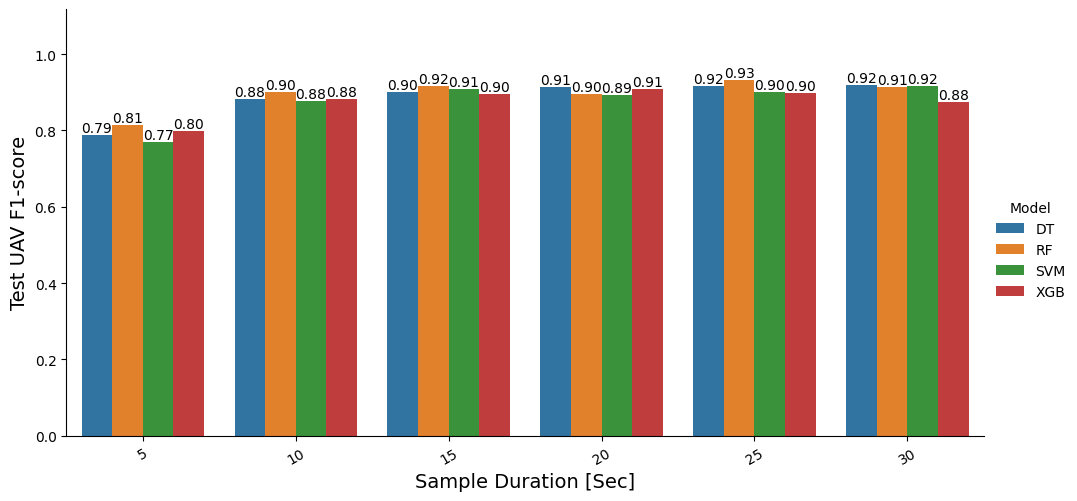

In [ ]:
g = sns.catplot(data=df_max, x = "Sample Duration", y = "Test UAV F1-score", hue = "Model", kind="bar", aspect = 2)

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ['%0.2f' % v for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='edge')
    # plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.margins(y=0.2)
plt.xlabel('Sample Duration [Sec]', fontsize=14)
plt.ylabel('Test UAV F1-score', fontsize=14)

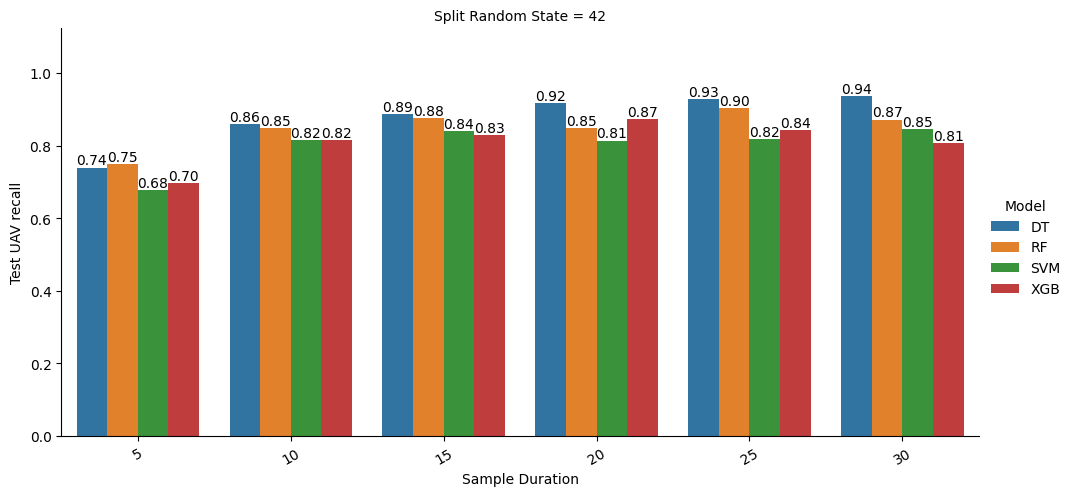

In [ ]:
g = sns.catplot(data=df_max, x = "Sample Duration", y = "Test UAV recall", hue = "Model", col="Split Random State", kind="bar", aspect = 2)

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ['%0.2f' % v for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='edge')
    # plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.margins(y=0.2)
plt.xlabel('Sample Duration [Sec]', fontsize=14)
plt.ylabel('Test UAV F1-score', fontsize=14)

In [ ]:
df_mac_rf = df_max[df_max['Model'] == 'RF']
df_mac_rf['Max Depth'] = extract_from_column(df_mac_rf, 'Model Config', 'max_depth')
df_mac_rf

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Model Random State,Split Random State,Features Type,Test UAV report,Test UAV precision,Test UAV recall,Test UAV F1-score,Max Depth
18,"05/09/2024, 13:48:54",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'subfolders_ind': [0, 1...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.7261904761904762,...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.8888888888888888, 'recall': 0....",0.888889,0.750000,0.813559,None
19,"05/09/2024, 13:48:54",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8529411764705882,...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.9629629629629629, 'recall': 0....",0.962963,0.847826,0.901734,None
20,"05/09/2024, 13:48:54",15,[NIR_airplane_20231023-19489_20231023-191158.j...,"{'sample_duration': 15, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8518518518518519,...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.9625, 'recall': 0.875, 'f1-sco...",0.962500,0.875000,0.916667,None
21,"05/09/2024, 13:48:54",20,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 20, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8809523809523809,...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.948051948051948, 'recall': 0.8...",0.948052,0.848837,0.895706,None
22,"05/09/2024, 13:48:54",25,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 25, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.918918918918919, ...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.9615384615384616, 'recall': 0....",0.961538,0.903614,0.931677,None
23,"05/09/2024, 13:48:54",30,[NIR_airplane_20231024-10120_20231024-030841.j...,"{'sample_duration': 30, 'subfolders_ind': [0, ...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.9655172413793104,...",0.760385,0.842,0.795449,0.844027,42,42,all,"{'precision': 0.9577464788732394, 'recall': 0....",0.957746,0.871795,0.912752,None
